<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Lista2_Exerc%C3%ADcio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

first_layer_weights: (1, 1)
Model: "Regressao_Linear"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Weights and biases of the layers after training the model: 

dense_27
weights
shape:  (1, 1) 
 [[1.9999933]]
bias
shape:  (1,) 
 [9.9999695] 

dict_keys(['loss', 'mean_absolute_error'])


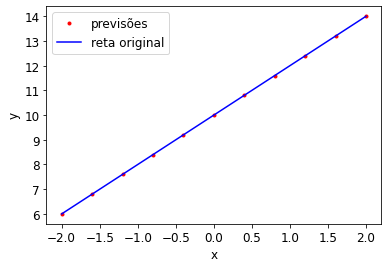

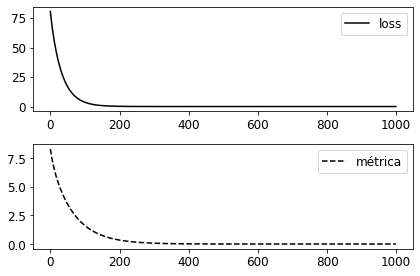

In [56]:
#rede completa para regressão linear
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

#Dtrain (data set)
xs = np.array([-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0], dtype=float)
ys =2*xs+10

#criando a rede neural
model=tf.keras.Sequential(name='Regressao_Linear')
#configurando a primeira camada da rede
#first_layer_weights = model.layers[0].get_weights()[0]
model.add(tf.keras.layers.Dense(1, input_dim=1, use_bias=1, activation='linear'))
opt=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
model.compile(optimizer=opt, loss='mean_squared_error', metrics='mean_absolute_error')
weight_updated=model.layers[0].get_weights()[0]
print('first_layer_weights:', model.layers[0].get_weights()[0].shape)
print(model.summary())
#treinando a rede
history=model.fit(xs, ys, epochs=1000, verbose=0)
#testando a rede
xs_test=np.linspace(-2,2,11);
ys_test=model.predict(xs_test)

#Pesos e tendências das camadas após treinar o modelo
print("Weights and biases of the layers after training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("weights")
  print("shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("bias")
  print("shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

#fazendo os gráficos
plt.rcParams.update({'font.size': 12})
plt.figure()
plt.plot(xs_test, ys_test, 'r.')
plt.plot(xs_test, (2*xs_test+10), 'b-')
plt.legend(['previsões', 'reta original'])
plt.xlabel('x');plt.ylabel('y')
#mostra os dados em history
print(history.history.keys())
#plota o loss e a metrica
plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'],'k')
plt.legend(['loss'])
plt.subplot(2,1,2)
plt.plot(history.history['mean_absolute_error'], 'k--')
plt.legend(['métrica'])
plt.tight_layout()
plt.show()